In [1]:
import os
from glob import glob
import pandas as pd
import geopandas as gpd
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
tests_path = '/mnt/datapool1/datapool1/datasets/nvis_outputs/tests/'
test_gpkgs = glob(os.path.join(tests_path, '**', '*.gpkg'))
test_gpkgs_df = pd.DataFrame(test_gpkgs, columns=['test_gpkg'])
test_gpkgs_df['basename'] = test_gpkgs_df['test_gpkg'].apply(os.path.basename)
test_gpkgs_df['tilename'] = test_gpkgs_df['basename'].str.split('_').str[5]
test_gpkgs_df['date'] = test_gpkgs_df['basename'].str.extract(r'(\d{8})')
test_gpkgs_df

,test_gpkg,basename,tilename,date
0,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_KI2025_finetune_20250512.gpkg,KI2025,20250512
1,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_KI2025_finetune_20250210.gpkg,KI2025,20250210
2,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_KI2025_finetune_20241204.gpkg,KI2025,20241204
3,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_KI2025_finetune_20250513.gpkg,KI2025,20250513
4,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_Tenterfield_finetune_202505...,Tenterfield,20250507
5,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_Tenterfield_finetune_202504...,Tenterfield,20250428
6,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_Tenterfield_finetune_202506...,Tenterfield,20250619
7,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_Tenterfield_finetune_202505...,Tenterfield,20250523
8,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_Tenterfield_finetune_202503...,Tenterfield,20250317
9,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_Tenterfield_finetune_202505...,Tenterfield,20250508


In [2]:
tests_path = '/mnt/datapool1/datapool1/datasets/nvis_outputs/tests/'
test_csvs = glob(os.path.join(tests_path, '**', '*.csv'))
test_csvs_df = pd.DataFrame(test_csvs, columns=['test_csv'])
test_csvs_df['basename'] = test_csvs_df['test_csv'].apply(os.path.basename)
test_csvs_df['tilename'] = test_csvs_df['basename'].str.split('_').str[5]
test_csvs_df['date'] = test_csvs_df['basename'].str.extract(r'(\d{8})')
test_csvs_df

,test_csv,basename,tilename,date
0,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_KI2025_finetune_20250513.csv,KI2025,20250513
1,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_KI2025_finetune_20250210.csv,KI2025,20250210
2,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_KI2025_finetune_20241204.csv,KI2025,20241204
3,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_KI2025_finetune_20250512.csv,KI2025,20250512
4,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_Tenterfield_finetune_202504...,Tenterfield,20250428
5,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_Tenterfield_finetune_202503...,Tenterfield,20250317
6,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_Tenterfield_finetune_202505...,Tenterfield,20250508
7,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_Tenterfield_finetune_202505...,Tenterfield,20250525
8,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_Tenterfield_finetune_202507...,Tenterfield,20250701
9,/mnt/datapool1/datapool1/datasets/nvis_outputs...,NVIS_8L_fm_mape_r1_Tenterfield_finetune_202506...,Tenterfield,20250619


In [3]:
all_results = []
aggregated_results = []
for tilename, group in test_gpkgs_df.groupby('tilename'):
    print(f"Tilename: {tilename}")
    # print(group)
    for index, row in group.iterrows():
        # print(row)
        test_gpkg = row['test_gpkg']
        test_gdf = gpd.read_file(test_gpkg)
        print(f"Test GPKG: {test_gpkg}")
        print(f"Shape: {test_gdf.shape}")
        
        # Define metric columns to aggregate
        metric_columns = ['test_Bias', 'test_MAE', 'test_MSE', 'test_RMSE', 'test_SMAPE', 
                         'mean_pred', 'mean_target', 'valid_count']
        
        # Start with metadata first
        aggregated_metrics = {
            'tilename': tilename,
            'date': row['date'],
            'basename': row['basename'],
            'test_gpkg': test_gpkg,
            'total_samples': len(test_gdf)
        }
        
        for metric in metric_columns:
            if metric in test_gdf.columns:
                aggregated_metrics[f'{metric}_mean'] = test_gdf[metric].mean()
                aggregated_metrics[f'{metric}_std'] = test_gdf[metric].std()
                aggregated_metrics[f'{metric}_median'] = test_gdf[metric].median()
                aggregated_metrics[f'{metric}_min'] = test_gdf[metric].min()
                aggregated_metrics[f'{metric}_max'] = test_gdf[metric].max()

        test_gdf['tilename'] = tilename
        test_gdf['date'] = row['date']
        test_gdf['basename'] = row['basename']
        test_gdf['test_gpkg'] = test_gpkg
        test_gdf['total_samples'] = len(test_gdf)
        test_gdf['area'] = test_gdf.geometry.area / 10_000

        # Append the test_gdf to all_results
        all_results.append(test_gdf)
        
        # Add to results
        aggregated_results.append(aggregated_metrics)
        
        print(f"Aggregated metrics calculated for {test_gpkg}")
        print("-" * 50)

aggregated_df = pd.DataFrame(aggregated_results)
all_results_gdf = pd.concat(all_results, ignore_index=True)
# aggregated_df

Tilename: Billabong
Test GPKG: /mnt/datapool1/datapool1/datasets/nvis_outputs/tests/NVIS_8L_fm_mape_r1_Billabong/NVIS_8L_fm_mape_r1_Billabong_finetune_20250206.gpkg
Shape: (1203, 16)
Aggregated metrics calculated for /mnt/datapool1/datapool1/datasets/nvis_outputs/tests/NVIS_8L_fm_mape_r1_Billabong/NVIS_8L_fm_mape_r1_Billabong_finetune_20250206.gpkg
--------------------------------------------------
Test GPKG: /mnt/datapool1/datapool1/datasets/nvis_outputs/tests/NVIS_8L_fm_mape_r1_Billabong/NVIS_8L_fm_mape_r1_Billabong_finetune_20250208.gpkg
Shape: (24, 16)
Aggregated metrics calculated for /mnt/datapool1/datapool1/datasets/nvis_outputs/tests/NVIS_8L_fm_mape_r1_Billabong/NVIS_8L_fm_mape_r1_Billabong_finetune_20250208.gpkg
--------------------------------------------------
Test GPKG: /mnt/datapool1/datapool1/datasets/nvis_outputs/tests/NVIS_8L_fm_mape_r1_Billabong/NVIS_8L_fm_mape_r1_Billabong_finetune_20250126.gpkg
Shape: (197, 16)
Aggregated metrics calculated for /mnt/datapool1/datapoo

In [3]:
all_results = []
aggregated_results = []
for tilename, group in test_csvs_df.groupby('tilename'):
    print(f"Tilename: {tilename}")
    # print(group)
    for index, row in group.iterrows():
        # print(row)
        test_csv = row['test_csv']
        test_gdf = pd.read_csv(test_csv)
        print(f"Test CSV: {test_csv}")
        print(f"Shape: {test_gdf.shape}")

        test_gdf = test_gdf[test_gdf['valid_count'] > 1]
        
        # Define metric columns to aggregate
        metric_columns = ['test_Bias', 'test_MAE', 'test_MSE', 'test_RMSE', 'test_SMAPE', 
                         'mean_pred', 'mean_target', 'valid_count']
        
        # Start with metadata first
        aggregated_metrics = {
            'tilename': tilename,
            'date': row['date'],
            'basename': row['basename'],
            'test_csv': test_csv,
            'total_samples': len(test_gdf)
        }
        
        for metric in metric_columns:
            if metric in test_gdf.columns:
                aggregated_metrics[f'{metric}_mean'] = test_gdf[metric].mean()
                aggregated_metrics[f'{metric}_std'] = test_gdf[metric].std()
                aggregated_metrics[f'{metric}_median'] = test_gdf[metric].median()
                aggregated_metrics[f'{metric}_min'] = test_gdf[metric].min()
                aggregated_metrics[f'{metric}_max'] = test_gdf[metric].max()

        test_gdf['tilename'] = tilename
        test_gdf['date'] = row['date']
        test_gdf['basename'] = row['basename']
        test_gdf['test_csv'] = test_csv
        test_gdf['total_samples'] = len(test_gdf)
        # test_gdf['area'] = test_gdf.geometry.area / 10_000

        # Append the test_gdf to all_results
        all_results.append(test_gdf)
        
        # Add to results
        aggregated_results.append(aggregated_metrics)

        print(f"Aggregated metrics calculated for {test_csv}")
        print("-" * 50)

aggregated_df = pd.DataFrame(aggregated_results)
all_results_gdf = pd.concat(all_results, ignore_index=True)
# aggregated_df

Tilename: Billabong
Test CSV: /mnt/datapool1/datapool1/datasets/nvis_outputs/tests/NVIS_8L_fm_mape_r1_Billabong/NVIS_8L_fm_mape_r1_Billabong_finetune_20250208.csv
Shape: (16224, 15)
Aggregated metrics calculated for /mnt/datapool1/datapool1/datasets/nvis_outputs/tests/NVIS_8L_fm_mape_r1_Billabong/NVIS_8L_fm_mape_r1_Billabong_finetune_20250208.csv
--------------------------------------------------
Test CSV: /mnt/datapool1/datapool1/datasets/nvis_outputs/tests/NVIS_8L_fm_mape_r1_Billabong/NVIS_8L_fm_mape_r1_Billabong_finetune_20250206.csv
Shape: (813904, 15)
Aggregated metrics calculated for /mnt/datapool1/datapool1/datasets/nvis_outputs/tests/NVIS_8L_fm_mape_r1_Billabong/NVIS_8L_fm_mape_r1_Billabong_finetune_20250206.csv
--------------------------------------------------
Test CSV: /mnt/datapool1/datapool1/datasets/nvis_outputs/tests/NVIS_8L_fm_mape_r1_Billabong/NVIS_8L_fm_mape_r1_Billabong_finetune_20250126.csv
Shape: (135200, 15)
Aggregated metrics calculated for /mnt/datapool1/datapoo

In [4]:
plt.style.use('default')
sns.set_palette("husl")

def make_scatter_plot(group):
    r_squared = r2_score(group['mean_target'], group['mean_pred'])
    correlation = np.corrcoef(group['mean_target'], group['mean_pred'])[0,1]
    
    plt.figure(figsize=(8, 6))

    plt.scatter(group['mean_target'], group['mean_pred'], 
    alpha=0.6, s=20, edgecolors='black', linewidth=0.5)

    min_val = min(group['mean_target'].min(), group['mean_pred'].min())
    max_val = max(group['mean_target'].max(), group['mean_pred'].max())
    plt.plot([min_val, max_val], [min_val, max_val], 
    'r--', linewidth=2, label='Perfect Prediction (1:1)')
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(group['mean_target'], group['mean_pred'])
    line = slope * group['mean_target'] + intercept
    plt.plot(group['mean_target'], line, 'b-', linewidth=2, label=f'Best Fit (slope={slope:.3f})')
    
    plt.xlabel('Observed Values (LiDAR)', fontsize=12)
    plt.ylabel('Predicted Values (Neural Network)', fontsize=12)
    plt.title(f'{tilename} - Predicted vs Observed\nR² = {r_squared:.4f}, r = {correlation:.4f}', fontsize=14, fontweight='bold')

    textstr = f'R² = {r_squared:.4f}\nPearson r = {correlation:.4f}\nRMSE = {np.sqrt(np.mean((group["mean_target"] - group["mean_pred"])**2)):.4f}\nn = {len(group)}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    
    # Equal aspect ratio and grid
    plt.axis('equal')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    
    # Save plot
    # plt.savefig(f'scatter_plot_{tilename}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [4]:
tile_lookup = {'Tenterfield': 'Eastern Australia Temperate and Subtropical forests',
               'MulgaLands': 'Eastern Australia Mulga Shrublands',
               'KI2020': 'South Australian Eucalypt Woodlands (2020)',
               'KI2025': 'South Australian Eucalypt Woodlands (2025)',
               'WASouth': 'South Western Australia Mallee Woodlands',
               'Billabong': 'Western Australian Temperate Sandplain Woodlands',}

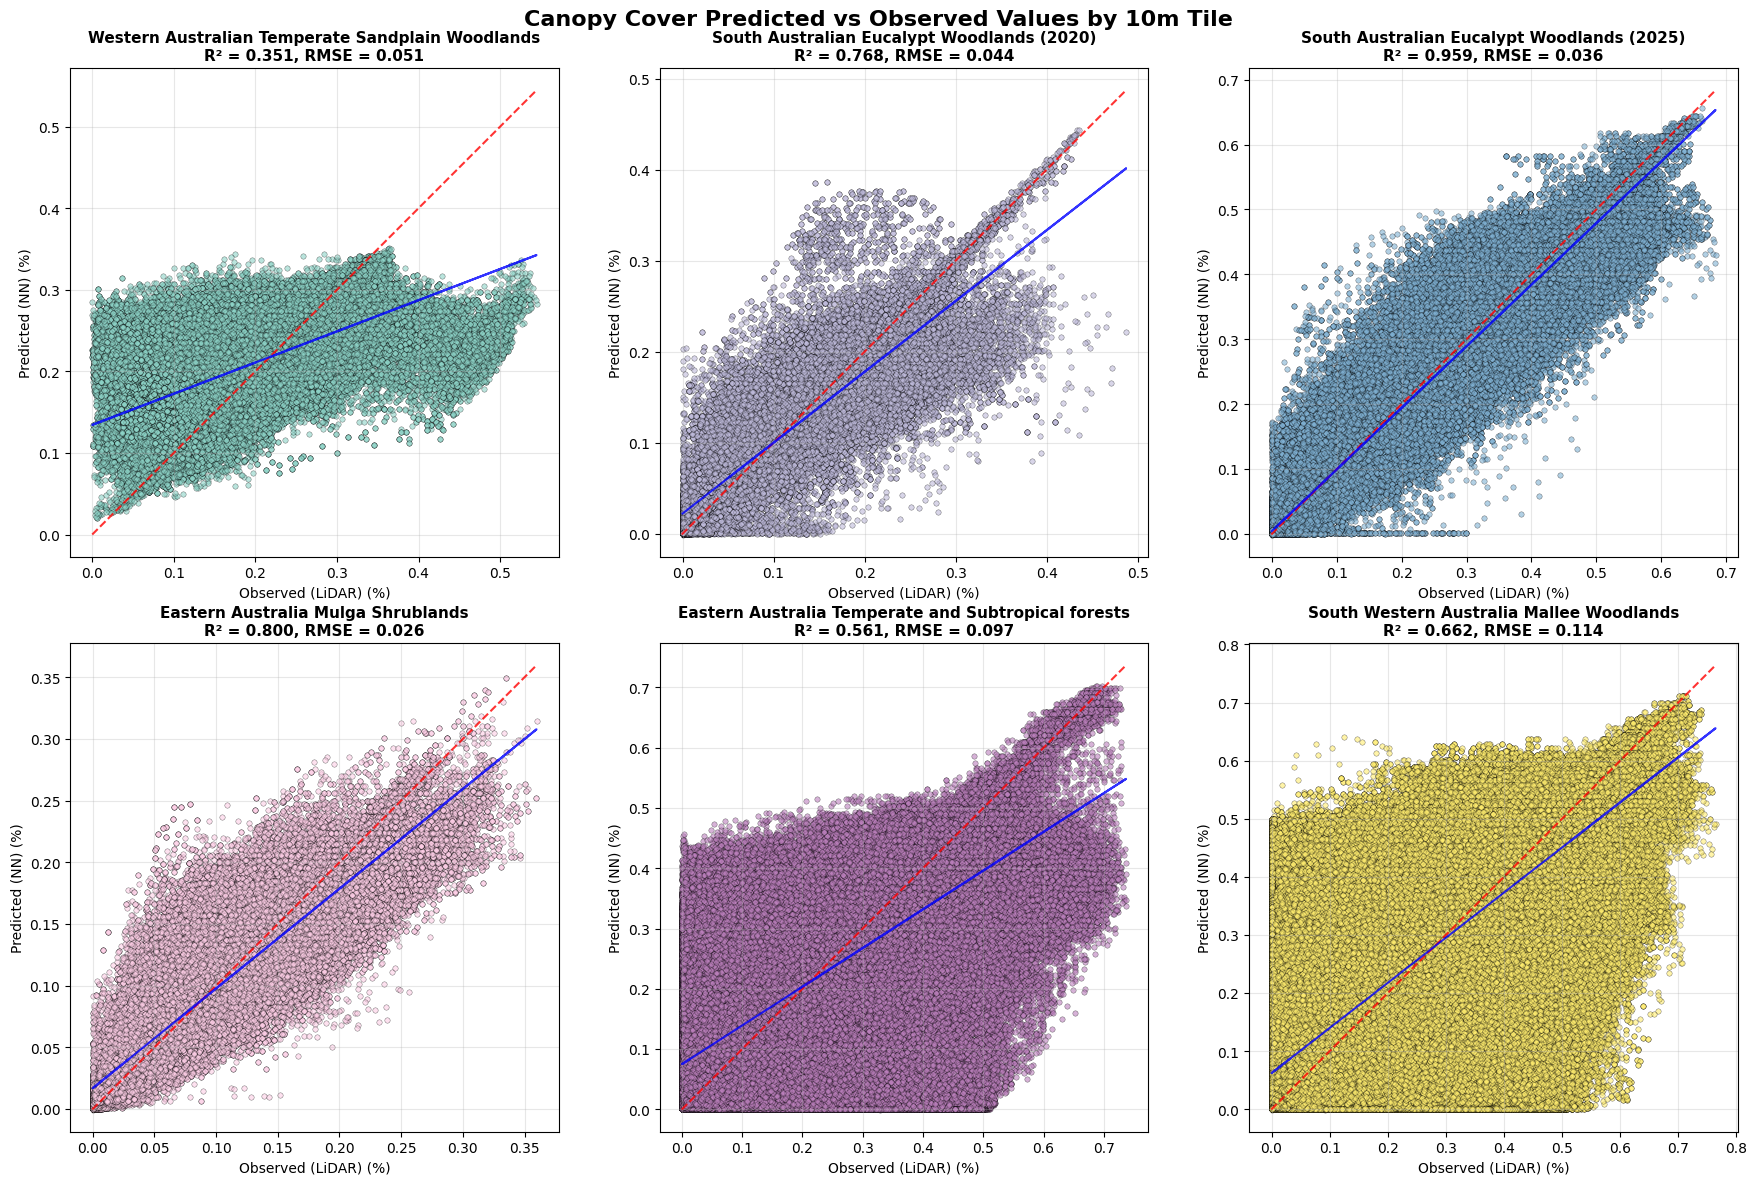

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()  # Flatten for easy indexing

tiles = all_results_gdf['tilename'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(tiles)))



for i, (tilename, group) in enumerate(all_results_gdf.groupby('tilename')):
    if 'mean_pred' in group.columns and 'mean_target' in group.columns:
        # Calculate metrics
        r_squared = r2_score(group['mean_target'], group['mean_pred'])
        correlation = np.corrcoef(group['mean_target'], group['mean_pred'])[0,1]
        rmse = np.sqrt(np.mean((group['mean_target'] - group['mean_pred'])**2))
        
        # Scatter plot
        axes[i].scatter(group['mean_target'], group['mean_pred'], 
                       alpha=0.6, s=15, color=colors[i], edgecolors='black', linewidth=0.3)
        
        # 1:1 line
        min_val = min(group['mean_target'].min(), group['mean_pred'].min())
        max_val = max(group['mean_target'].max(), group['mean_pred'].max())
        axes[i].plot([min_val, max_val], [min_val, max_val], 
                    'r--', linewidth=1.5, alpha=0.8)
        
        # Best fit line
        slope, intercept, _, _, _ = stats.linregress(group['mean_target'], group['mean_pred'])
        line = slope * group['mean_target'] + intercept
        axes[i].plot(group['mean_target'], line, 'b-', linewidth=1.5, alpha=0.8)
        
        # Labels and title
        axes[i].set_xlabel('Observed (LiDAR) (%)', fontsize=10)
        axes[i].set_ylabel('Predicted (NN) (%)', fontsize=10)
        axes[i].set_title(f'{tile_lookup[tilename]}\nR² = {r_squared:.3f}, RMSE = {rmse:.3f}', 
                         fontsize=11, fontweight='bold')
        
        # Grid and equal aspect
        axes[i].grid(True, alpha=0.3)
        axes[i].set_aspect('equal', adjustable='box')

# Overall title
fig.suptitle('Canopy Cover Predicted vs Observed Values by 10m Tile', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.savefig(os.path.join(tests_path, 'all_tiles_scatter_plots_10m_tile.png'), dpi=300, bbox_inches='tight')
plt.show()

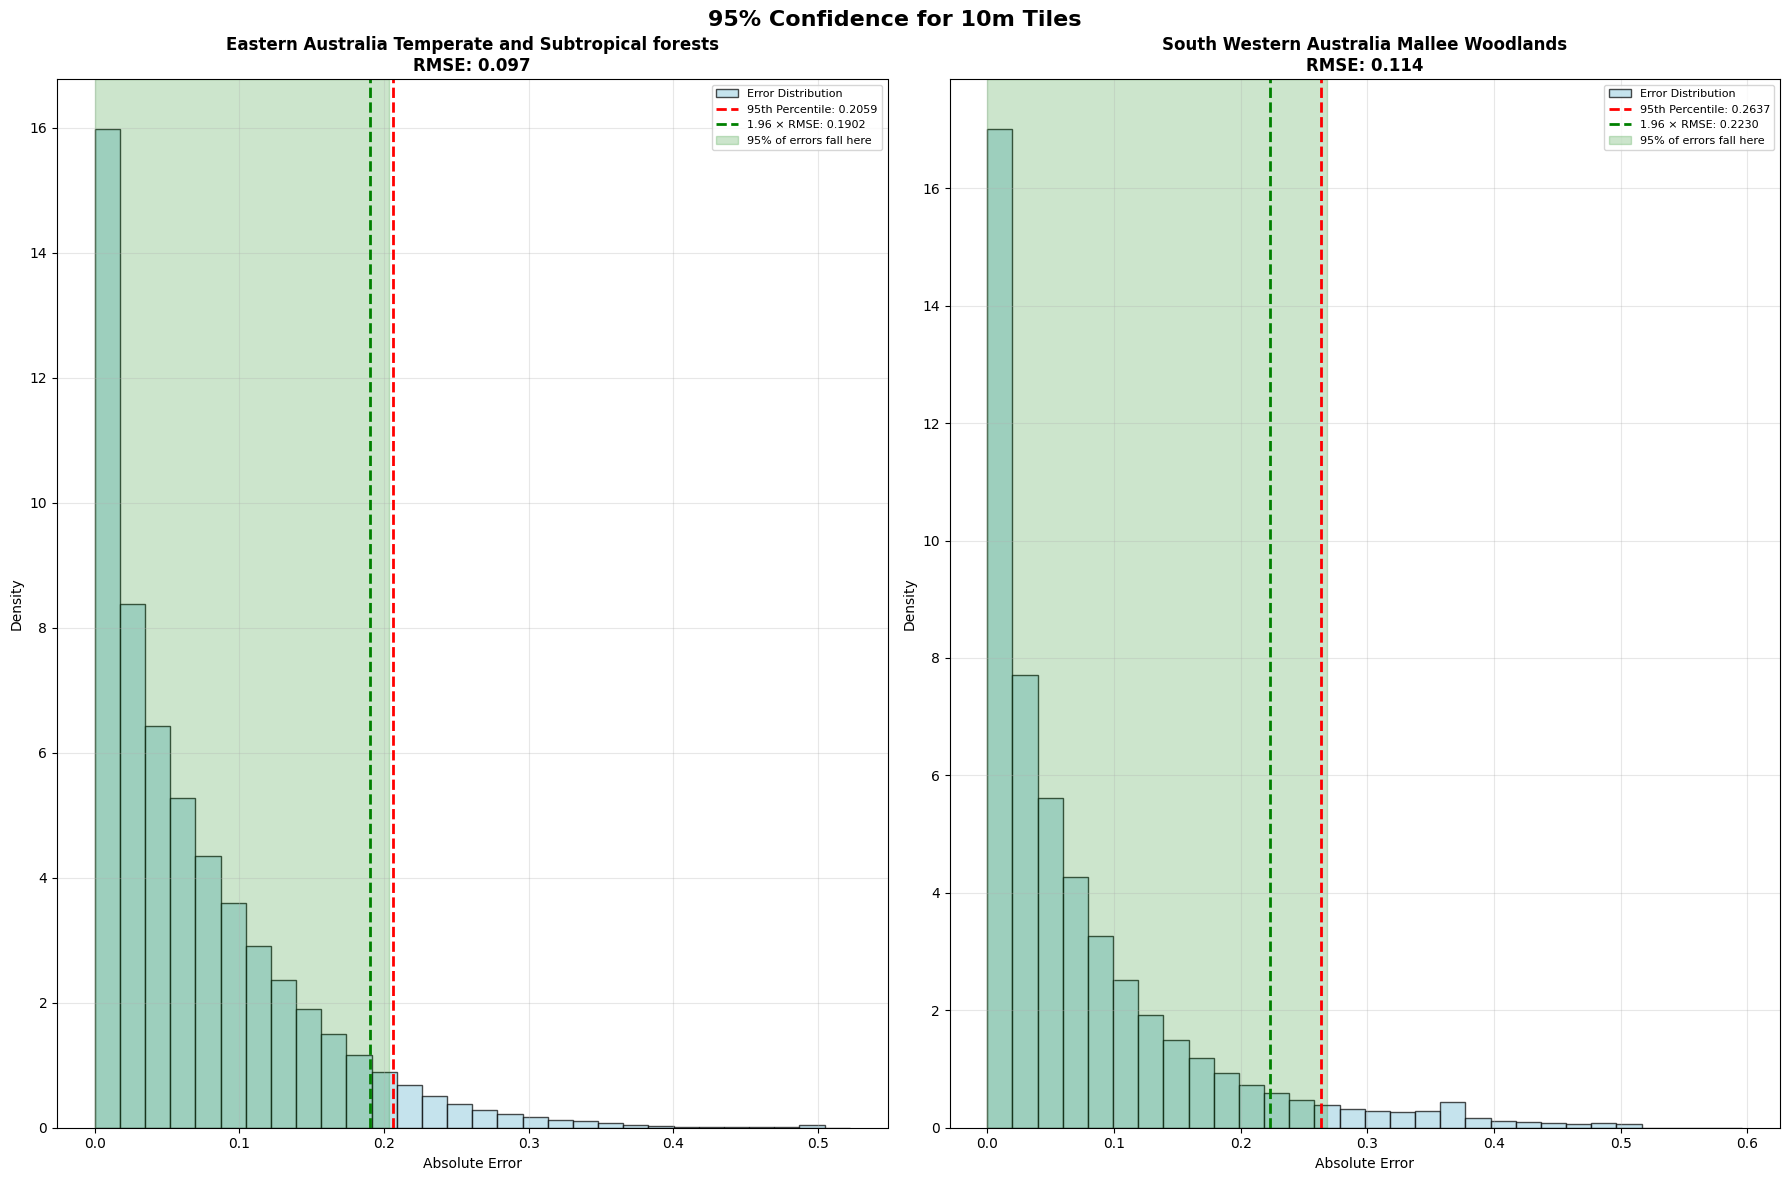

In [6]:
# fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig, axes = plt.subplots(1, 2, figsize=(18, 12))
fig.suptitle('95% Confidence for 10m Tiles', fontsize=16, fontweight='bold')

tile_names = all_results_gdf['tilename'].unique()

ax_id = 0
for i, (tilename, group) in enumerate(all_results_gdf.groupby('tilename')):
    if i < 4 or i >= 6:
        continue
        
    # row = i // 3
    # col = i % 3
    ax = axes[ax_id]
    ax_id += 1
    
    if 'mean_pred' in group.columns and 'mean_target' in group.columns:
        # Calculate errors
        residuals = group['mean_pred'] - group['mean_target']
        absolute_errors = np.abs(residuals)
        
        # Calculate metrics
        rmse = np.sqrt(np.mean(residuals**2))
        accuracy_95_percentile = np.percentile(absolute_errors, 95)
        accuracy_95_nssda = 1.96 * rmse
        
        # Create histogram of absolute errors
        ax.hist(absolute_errors, bins=30, alpha=0.7, color='lightblue', 
                edgecolor='black', density=True, label='Error Distribution')
        
        # Add vertical lines for 95% confidence levels
        ax.axvline(accuracy_95_percentile, color='red', linestyle='--', linewidth=2,
                    label=f'95th Percentile: {accuracy_95_percentile:.4f}')
        ax.axvline(accuracy_95_nssda, color='green', linestyle='--', linewidth=2,
                    label=f'1.96 × RMSE: {accuracy_95_nssda:.4f}')
        
        # Shade the 95% area
        x_vals = np.linspace(0, max(absolute_errors), 1000)
        hist_vals, bin_edges = np.histogram(absolute_errors, bins=50, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        # Find where 95% of data falls
        cumsum = np.cumsum(hist_vals) * (bin_edges[1] - bin_edges[0])
        idx_95 = np.where(cumsum >= 0.95)[0]
        if len(idx_95) > 0:
            x_95 = bin_centers[idx_95[0]]
            ax.axvspan(0, x_95, alpha=0.2, color='green', 
                        label='95% of errors fall here')
        
        ax.set_title(f'{tile_lookup[tilename]}\nRMSE: {rmse:.3f}', fontweight='bold')
        ax.set_xlabel('Absolute Error')
        ax.set_ylabel('Density')
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(tests_path, '95_confidence_visualization_10m_tile_2.png'), dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# fig, axes = plt.subplots(2, 3, figsize=(18, 12))
# fig, axes = plt.subplots(1, 2, figsize=(18, 12))
# fig.suptitle('95% Confidence for 10m Tiles', fontsize=16, fontweight='bold')

# tile_names = all_results_gdf['tilename'].unique()

ax_id = 0
for i, (tilename, group) in enumerate(all_results_gdf.groupby('tilename')):
    print('i:', i)
    print('tilename:', tilename)
    if i < 2 or i >= 4:
        continue

    print('i:', i)
    print('ax_id:', ax_id)
        
    # row = i // 3
    # col = i % 3
    # ax = axes[ax_id]
    # ax_id += 1
    
    # if 'mean_pred' in group.columns and 'mean_target' in group.columns:
    #     # Calculate errors
    #     residuals = group['mean_pred'] - group['mean_target']
    #     absolute_errors = np.abs(residuals)
        
    #     # Calculate metrics
    #     rmse = np.sqrt(np.mean(residuals**2))
    #     accuracy_95_percentile = np.percentile(absolute_errors, 95)
    #     accuracy_95_nssda = 1.96 * rmse
        
    #     # Create histogram of absolute errors
    #     ax.hist(absolute_errors, bins=30, alpha=0.7, color='lightblue', 
    #             edgecolor='black', density=True, label='Error Distribution')
        
    #     # Add vertical lines for 95% confidence levels
    #     ax.axvline(accuracy_95_percentile, color='red', linestyle='--', linewidth=2,
    #                 label=f'95th Percentile: {accuracy_95_percentile:.4f}')
    #     ax.axvline(accuracy_95_nssda, color='green', linestyle='--', linewidth=2,
    #                 label=f'1.96 × RMSE: {accuracy_95_nssda:.4f}')
        
    #     # Shade the 95% area
    #     x_vals = np.linspace(0, max(absolute_errors), 1000)
    #     hist_vals, bin_edges = np.histogram(absolute_errors, bins=50, density=True)
    #     bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
    #     # Find where 95% of data falls
    #     cumsum = np.cumsum(hist_vals) * (bin_edges[1] - bin_edges[0])
    #     idx_95 = np.where(cumsum >= 0.95)[0]
    #     if len(idx_95) > 0:
    #         x_95 = bin_centers[idx_95[0]]
    #         ax.axvspan(0, x_95, alpha=0.2, color='green', 
    #                     label='95% of errors fall here')
        
    #     ax.set_title(f'{tile_lookup[tilename]}\nRMSE: {rmse:.3f}', fontweight='bold')
    #     ax.set_xlabel('Absolute Error')
    #     ax.set_ylabel('Density')
    #     ax.legend(fontsize=8)
    #     ax.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.savefig(os.path.join(tests_path, '95_confidence_visualization_10m_tile_1.png'), dpi=300, bbox_inches='tight')
# plt.show()

In [6]:

metrics = []
for tilename, group in all_results_gdf.groupby('tilename'):
    print(group.columns)

    if 'mean_pred' in group.columns and 'mean_target' in group.columns:
        r_squared = r2_score(group['mean_target'], group['mean_pred'])
        tile_rmse = np.sqrt(np.mean((group['mean_target'] - group['mean_pred'])**2))
        tile_mae = np.mean(np.abs(group['mean_target'] - group['mean_pred']))
        tile_bias = np.mean(group['mean_target'] - group['mean_pred'])
        correlation = np.corrcoef(group['mean_target'], group['mean_pred'])[0,1]

    # pixel_rmse = group['test_RMSE'].mean()
    # pixel_mae = group['test_MAE'].mean()
    # pixel_bias = group['test_Bias'].mean()

    metrics.append({
        'tilename': tilename,
        'NVIS_tilename': tile_lookup[tilename],
        'r_squared': r_squared,
        # 'pixel_mean_rmse': pixel_rmse,
        # 'pixel_mean_mae': pixel_mae,
        # 'pixel_mean_bias': pixel_bias,
        # 'pixel_95_confidence': 1.96 * pixel_rmse,
        'tile_mean_rmse': tile_rmse,
        'tile_mean_mae': tile_mae,
        'tile_mean_bias': tile_bias,
        'tile_95_confidence': 1.96 * tile_rmse,
        'correlation': correlation,
    })

metrics_df = pd.DataFrame(metrics)

total_row = {
    'tilename': 'TOTAL_SYSTEM',
    'NVIS_tilename': 'All Tiles Combined',
    # 'pixel_mean_rmse': metrics_df['pixel_mean_rmse'].mean(),
    # 'pixel_mean_mae': metrics_df['pixel_mean_mae'].mean(),
    # 'pixel_mean_bias': metrics_df['pixel_mean_bias'].mean(),
    # 'pixel_95_confidence': 1.96 * metrics_df['pixel_mean_rmse'].mean(),
    'tile_mean_rmse': metrics_df['tile_mean_rmse'].mean(),
    'tile_mean_mae': metrics_df['tile_mean_mae'].mean(),
    'tile_mean_bias': metrics_df['tile_mean_bias'].mean(),
    'tile_95_confidence': 1.96 * metrics_df['tile_mean_rmse'].mean(),
    # ... other fields as needed
}

metrics_df = pd.concat([metrics_df, pd.DataFrame([total_row])], ignore_index=True)

metrics_df.to_csv(os.path.join(tests_path, 'accuracy_metrics_all_nn_tile.csv'), index=False)

Index(['test_Bias', 'test_MAE', 'test_MSE', 'test_RMSE', 'test_SMAPE',
       'mean_pred', 'mean_target', 'valid_count', 'file', 'bands', 'index',
       'image_dataset', 'cover_dataset', 'vector_dataset', 'wavelengths',
       'geometry', 'tilename', 'date', 'basename', 'test_gpkg',
       'total_samples', 'area'],
      dtype='object')
Index(['test_Bias', 'test_MAE', 'test_MSE', 'test_RMSE', 'test_SMAPE',
       'mean_pred', 'mean_target', 'valid_count', 'file', 'bands', 'index',
       'image_dataset', 'cover_dataset', 'vector_dataset', 'wavelengths',
       'geometry', 'tilename', 'date', 'basename', 'test_gpkg',
       'total_samples', 'area'],
      dtype='object')
Index(['test_Bias', 'test_MAE', 'test_MSE', 'test_RMSE', 'test_SMAPE',
       'mean_pred', 'mean_target', 'valid_count', 'file', 'bands', 'index',
       'image_dataset', 'cover_dataset', 'vector_dataset', 'wavelengths',
       'geometry', 'tilename', 'date', 'basename', 'test_gpkg',
       'total_samples', 'area'],
  

In [45]:
# Display summary
print("Aggregated Results:")
# print(aggregated_df.head())

# Optional: Save results
csv_path = os.path.join(tests_path, 'NVIS_aggregated_test_results.csv')
aggregated_df.to_csv(csv_path, index=False)
print(f"Results saved to {csv_path}")

Aggregated Results:
Results saved to /mnt/datapool1/datapool1/datasets/nvis_outputs/tests/NVIS_aggregated_test_results.csv


In [47]:
# After creating the aggregated_df from the previous code...

# Aggregate by tilename - calculate summary statistics across all dates/files for each tile
tilename_aggregated = aggregated_df.groupby('tilename').agg({
    # Metadata
    'date': ['count', 'min', 'max'],  # Count of files, earliest and latest dates
    'total_samples': 'sum',  # Total samples across all files for this tile
    
    # Key metrics - mean across all files for this tilename
    'test_Bias_mean': ['mean', 'std', 'min', 'max'],  # Bias included
    'test_MAE_mean': ['mean', 'std', 'min', 'max'],
    'test_RMSE_mean': ['mean', 'std', 'min', 'max'], 
    'test_SMAPE_mean': ['mean', 'std', 'min', 'max'],
    'test_MSE_mean': ['mean', 'std', 'min', 'max'],
    'mean_pred_mean': ['mean', 'std', 'min', 'max'],
    'mean_target_mean': ['mean', 'std', 'min', 'max'],
    
    # Standard deviations - mean of the std values
    'test_Bias_std': 'mean',  # Bias std included
    'test_MAE_std': 'mean',
    'test_RMSE_std': 'mean',
    'test_SMAPE_std': 'mean'
}).round(4)

# Flatten column names
tilename_aggregated.columns = ['_'.join(col).strip() for col in tilename_aggregated.columns.values]

# Reset index to make tilename a column
tilename_aggregated = tilename_aggregated.reset_index()

# Rename columns for clarity
column_renames = {
    'date_count': 'num_files',
    'date_min': 'earliest_date', 
    'date_max': 'latest_date',
    'total_samples_sum': 'total_samples_all_files'
}

tilename_aggregated = tilename_aggregated.rename(columns=column_renames)

# Reorder columns with metadata first
metadata_cols = ['tilename', 'num_files', 'earliest_date', 'latest_date', 'total_samples_all_files']
metric_cols = [col for col in tilename_aggregated.columns if col not in metadata_cols]
tilename_aggregated = tilename_aggregated[metadata_cols + sorted(metric_cols)]

# Display results
print("Tilename Aggregated Results:")
print(tilename_aggregated)

# Save to CSV
tilename_aggregated.to_csv('tilename_aggregated_results.csv', index=False)
print("\nTilename aggregated results saved to 'tilename_aggregated_results.csv'")

# Updated summary table INCLUDING BIAS
summary_table = tilename_aggregated[['tilename', 'num_files', 'total_samples_all_files',
                                   'test_Bias_mean_mean', 'test_Bias_mean_std',  # Added bias
                                   'test_MAE_mean_mean', 'test_MAE_mean_std',
                                   'test_RMSE_mean_mean', 'test_RMSE_mean_std', 
                                   'test_SMAPE_mean_mean', 'test_SMAPE_mean_std']].copy()

# Rename for readability INCLUDING BIAS
summary_table = summary_table.rename(columns={
    'test_Bias_mean_mean': 'Bias_avg',         # Added bias
    'test_Bias_mean_std': 'Bias_stdev',  # Added bias
    'test_MAE_mean_mean': 'MAE_avg',
    'test_MAE_mean_std': 'MAE_stdev',
    'test_RMSE_mean_mean': 'RMSE_avg', 
    'test_RMSE_mean_std': 'RMSE_stdev',
    'test_SMAPE_mean_mean': 'SMAPE_avg',
    'test_SMAPE_mean_std': 'SMAPE_stdev'
})

print("\nSummary Table (with Bias):")
print(summary_table)

# Save summary table
csv_path = os.path.join(tests_path, 'NVIS_tilename_summary.csv')
summary_table.to_csv(csv_path, index=False)
print(f"Summary table saved to {csv_path}")

Tilename Aggregated Results:
      tilename  num_files earliest_date latest_date  total_samples_all_files  \
0    Billabong          3      20250126    20250208                     1424   
1       KI2020          3      20201108    20201211                      267   
2       KI2025          4      20241204    20250513                     1560   
3   MulgaLands          2      20230103    20230511                      802   
4  Tenterfield          8      20250317    20250701                     5949   
5      WASouth          8      20230715    20250328                     3568   

   mean_pred_mean_max  mean_pred_mean_mean  mean_pred_mean_min  \
0              0.2315               0.2233              0.2163   
1              0.1492               0.1142              0.0781   
2              0.3510               0.1981              0.1320   
3              0.1014               0.1008              0.1002   
4              0.3257               0.2256              0.1358   
5             